In [1]:
# API 키를 환경변수로 관리하기 위한 설정 파일
from dotenv import load_dotenv

# API 키 정보 로드
load_dotenv()

True

In [2]:
# LangSmith 추적을 설정합니다. https://smith.langchain.com
# !pip install -qU langchain-teddynote
from langchain_teddynote import logging

# 프로젝트 이름을 입력합니다.
logging.langsmith("CH15-Agent-CSV-Excel")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH15-Agent-CSV-Excel


In [3]:
import pandas as pd

df = pd.read_csv("../data/titanic.csv")  # CSV 파일을 읽습니다.
# df2 = pd.read_excel("./data/titanic.xlsx", sheet_name="Sheet1") # 엑셀 파일도 읽을 수 있습니다.
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
from langchain_experimental.tools import PythonAstREPLTool

# 파이썬 코드를 실행하는 도구를 생성합니다.
python_tool = PythonAstREPLTool()
python_tool.locals["df"] = df


# 도구 호출 시 실행되는 콜백 함수입니다.
def tool_callback(tool) -> None:
    print(f"<<<<<<< Code >>>>>>")
    if tool_name := tool.get("tool"):  # 도구에 입력된 값이 있다면
        if tool_name == "python_repl_ast":
            tool_input = tool.get("tool_input")
            for k, v in tool_input.items():
                if k == "query":
                    print(v)  # Query 를 출력합니다.
                    result = python_tool.invoke({"query": v})
                    print(result)
    print(f"<<<<<<< Code >>>>>>")


# 관찰 결과를 출력하는 콜백 함수입니다.
def observation_callback(observation) -> None:
    print(f"<<<<<<< Message >>>>>>")
    if "observation" in observation:
        print(observation["observation"])
    print(f"<<<<<<< Message >>>>>>")


# 최종 결과를 출력하는 콜백 함수입니다.
def result_callback(result: str) -> None:
    print(f"<<<<<<< 최종 답변 >>>>>>")
    print(result)
    print(f"<<<<<<< 최종 답변 >>>>>>")

In [ ]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent
from langchain.agents.agent_types import AgentType
from langchain_openai import ChatOpenAI
from langchain_teddynote.messages import AgentStreamParser, AgentCallbacks

agent = create_pandas_dataframe_agent(
    ChatOpenAI(model="gpt-4o", temperature=0),
    df,
    verbose=False,
    agent_type="tool-calling",
    allow_dangerous_code=True,
    prefix="You are a professional data analyst and expert in Pandas. "
    "You must use Pandas DataFrame(`df`) to answer user's request. "
    "\n\n[IMPORTANT] DO NOT create or overwrite the `df` variable in your code. \n\n"
    "If you are willing to generate visualization code, please use `plt.show()` at the end of your code. "
    "I prefer seaborn code for visualization, but you can use matplotlib as well."
    "\n\n<Visualization Preference>\n"
    "- `muted` cmap, white background, and no grid for your visualization."
    "\nRecomment to set palette parameter for seaborn plot.",
)

parser_callback = AgentCallbacks(tool_callback, observation_callback, result_callback)
stream_parser = AgentStreamParser(parser_callback)

In [6]:
def ask(query):
    # 질의에 대한 답변을 출력합니다.
    response = agent.stream({"input": query})

    for step in response:
        stream_parser.process_agent_steps(step)

<<<<<<< Code >>>>>>
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='muted', annot=True, fmt='.2f', linewidths=.5, cbar_kws={'shrink': .5}, square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'
<<<<<<< Message >>>>>>
<<<<<<< Code >>>>>>
# Dropping non-numeric columns for correlation calculation
numeric_df = df.drop(columns=['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'])

# Calculate the correlation matrix
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cm

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

<<<<<<< Code >>>>>>
# Using a different colormap since 'muted' is not available
# Calculate the correlation matrix
corr = numeric_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, cbar_kws={'shrink': .5}, square=True)

# Set the title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


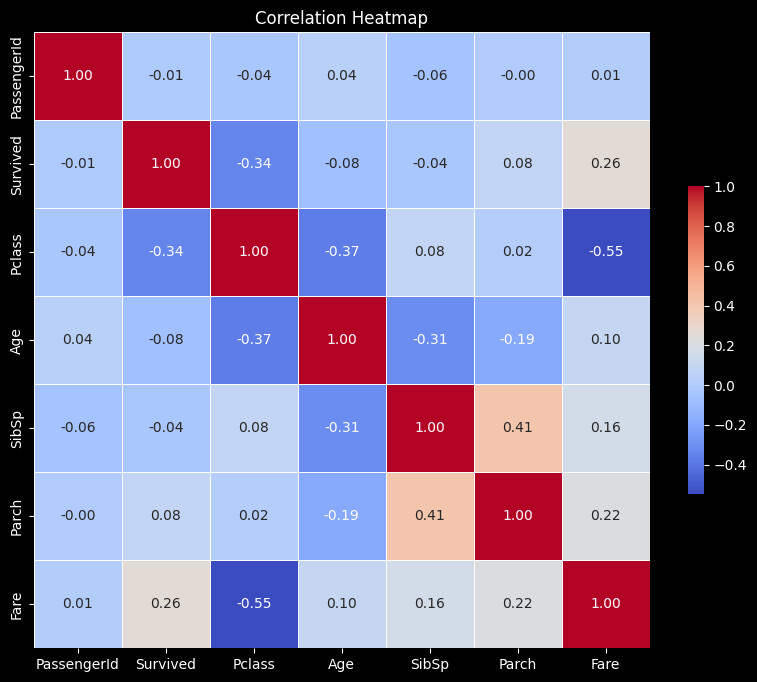


<<<<<<< Code >>>>>>


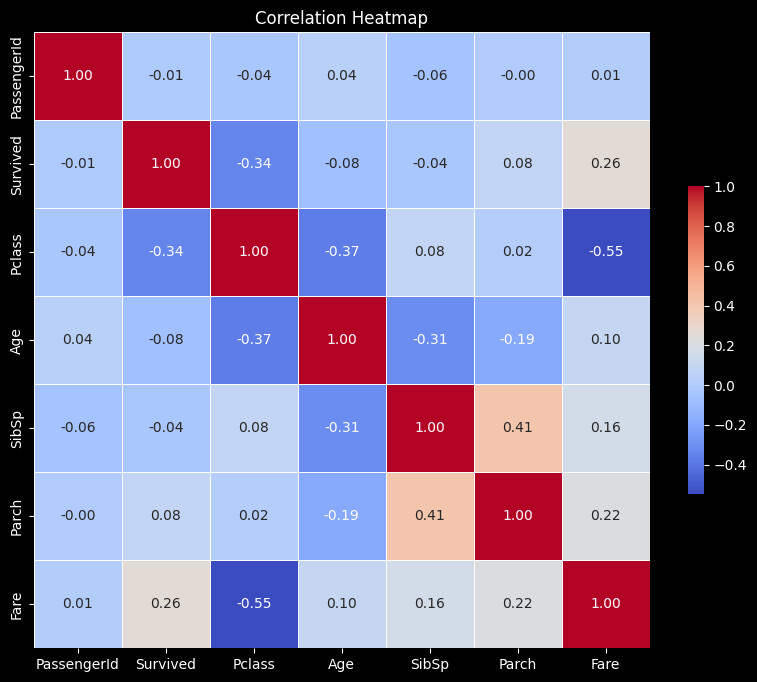

<<<<<<< Message >>>>>>

<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
I have calculated the correlation matrix for the numeric columns in the DataFrame and visualized it using a heatmap. The heatmap displays the correlation coefficients between different features, with a color gradient representing the strength and direction of the correlations.
<<<<<<< 최종 답변 >>>>>>


In [7]:
ask("corr() 을 구해서 히트맵 시각화")

In [8]:
ask("가장 많이 살아남은 연령대가 몇살이야")

<<<<<<< Code >>>>>>
df['Age'].dropna().astype(int).mode()
0    24
Name: Age, dtype: int64
<<<<<<< Code >>>>>>
<<<<<<< Message >>>>>>
0    24
Name: Age, dtype: int64
<<<<<<< Message >>>>>>
<<<<<<< 최종 답변 >>>>>>
가장 많이 살아남은 연령대는 24살입니다.
<<<<<<< 최종 답변 >>>>>>


In [9]:
ask("각각의 변수가 의미하는 것은?")

<<<<<<< 최종 답변 >>>>>>
주어진 데이터프레임 `df`의 각 변수는 다음과 같은 의미를 가집니다:

- `PassengerId`: 승객의 고유 식별자입니다.
- `Survived`: 생존 여부를 나타내며, 0은 사망, 1은 생존을 의미합니다.
- `Pclass`: 승객의 티켓 등급을 나타내며, 1, 2, 3의 세 가지 등급이 있습니다.
- `Name`: 승객의 이름입니다.
- `Sex`: 승객의 성별입니다.
- `Age`: 승객의 나이입니다.
- `SibSp`: 함께 탑승한 형제자매 또는 배우자의 수입니다.
- `Parch`: 함께 탑승한 부모 또는 자녀의 수입니다.
- `Ticket`: 티켓 번호입니다.
- `Fare`: 티켓 요금입니다.
- `Cabin`: 객실 번호입니다.
- `Embarked`: 승선한 항구를 나타내며, C = Cherbourg, Q = Queenstown, S = Southampton을 의미합니다.
<<<<<<< 최종 답변 >>>>>>


In [10]:
ask("사용가능한 seaborn 차트 종류알려줘")

<<<<<<< 최종 답변 >>>>>>
Seaborn은 다양한 유형의 차트를 제공하여 데이터 시각화를 쉽게 할 수 있도록 도와줍니다. 다음은 Seaborn에서 사용할 수 있는 주요 차트 유형입니다:

1. **Scatter Plot (산점도)**: `sns.scatterplot()`
2. **Line Plot (선 그래프)**: `sns.lineplot()`
3. **Bar Plot (막대 그래프)**: `sns.barplot()`
4. **Count Plot (카운트 플롯)**: `sns.countplot()`
5. **Box Plot (상자 그림)**: `sns.boxplot()`
6. **Violin Plot (바이올린 플롯)**: `sns.violinplot()`
7. **Strip Plot (스트립 플롯)**: `sns.stripplot()`
8. **Swarm Plot (스웜 플롯)**: `sns.swarmplot()`
9. **Histogram (히스토그램)**: `sns.histplot()`
10. **KDE Plot (커널 밀도 추정 플롯)**: `sns.kdeplot()`
11. **Pair Plot (페어 플롯)**: `sns.pairplot()`
12. **Heatmap (히트맵)**: `sns.heatmap()`
13. **Facet Grid (페싯 그리드)**: `sns.FacetGrid()`
14. **Joint Plot (조인트 플롯)**: `sns.jointplot()`
15. **LM Plot (회귀 플롯)**: `sns.lmplot()`

이 외에도 Seaborn은 다양한 스타일과 테마를 제공하여 차트를 더욱 아름답고 직관적으로 만들 수 있습니다.
<<<<<<< 최종 답변 >>>>>>
